# Weather Project - Rain Precipitation between Seattle and Honolulu - Data Preparation
In this notebook, we will prepare the data Weather project by cleaning and transforming the datasets gathered from National Oceanic and Atmospheric Administration (NOAA), containing daily rain precipitation data for Seattle and Honolulu from 2018 to 2022.


## Project Overview
This project analyzes daily rain precipitation between Seattle and Honolulu in 2018 - 2022. It will compare rain precipitation between the two cities and determine if Honolulu gets more rain than Seattle. The report would initially compare total daily rain precipitation between the two cities and then analyze how it varies on a monthly basis evaluating seasonal trends, and variability.



## Import Libraries

Importing common Python libraries for data manipulation and visualization.


In [4]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Load the data

Loading and analyzing the datasets for Seattle and Honolulu from CSV files into pandas DataFrames.

### Seattle

Loading Seattle weather data from CSV file into a pandas DataFrame.

In [5]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/JLichwa80/weather/refs/heads/main/data/seattle_rain.csv')

In [6]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


We can observe that the dataset contains multiple columns, but we will reduce them to the relevant ones for our analysis.

Reduce columns to relevant for our analysis to Station, Name, Date and PRCP 

In [7]:
df_seattle = df_seattle[['STATION','NAME','DATE','PRCP']]
df_seattle.head()

,STATION,NAME,DATE,PRCP
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,0.00
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,0.00
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,0.00
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,0.00
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,0.25


### Honolulu

Loading Honolulu weather data from CSV file into a pandas DataFrame.

In [8]:
df_honolulu = pd.read_csv('https://raw.githubusercontent.com/JLichwa80/weather/refs/heads/main/data/hnl_rain.csv')

In [9]:
df_honolulu.head()

,STATION,NAME,DATE,PRCP
0,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-01,0.0
1,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-02,0.0
2,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-03,0.0
3,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-04,0.0
4,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-05,0.0


## Data cleanup and preparation for analysis

In this section, we will clean and prepare the data for analysis by handling missing values, converting data types, and filtering the data as needed.


### Evaluate the datasets completeness in terms of number of rows and columns.

In [34]:
print(df_seattle.shape)
print(df_honolulu.shape)

(1658, 4)
(1826, 4)


Based on above we can see that honolulu has complete data for all dates (4*365+366=1826 days) whereas seattle has only 1658 days (1826-1658=168 days missing data).

Plotting the data for Seattle to visualize any discrepancies.

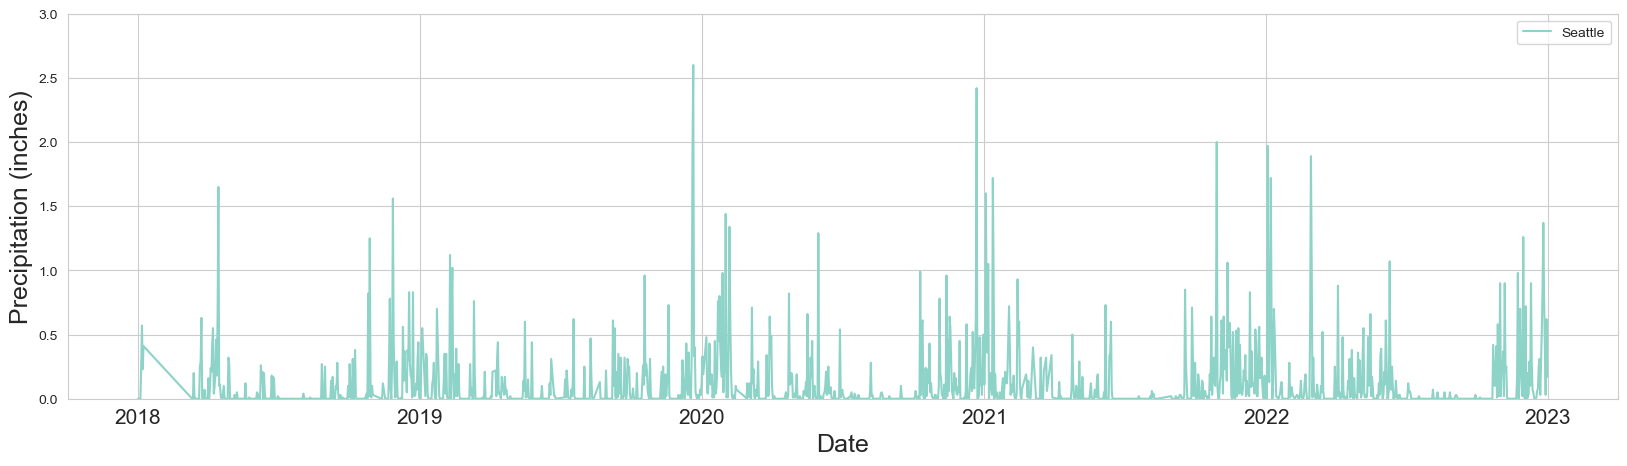

In [35]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_seattle, x='DATE', y='PRCP', label='Seattle')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.ylim(0, 3)
plt.xticks(fontsize=15)
plt.show()


From plot we can notice diagonal line in the beginning of 2018 which indicates missing data for Seattle in this period. We can also see higher precipitation values during witnter months as expected.

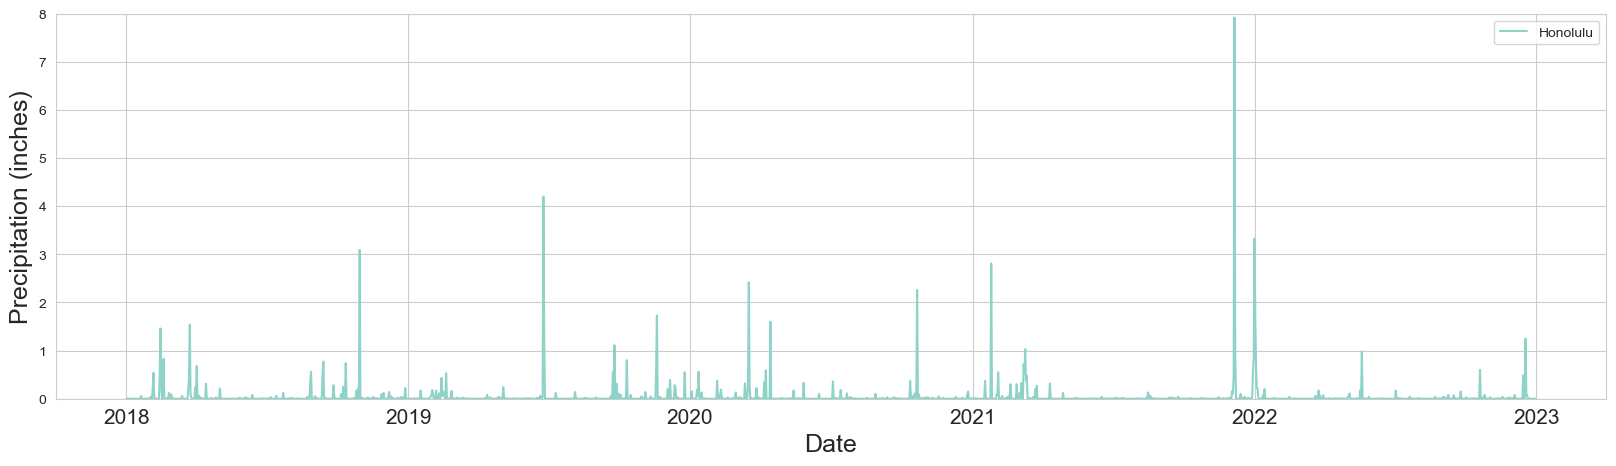

In [36]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_honolulu, x='DATE', y='PRCP', label='Honolulu')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Precipitation (inches)',fontsize=18)
plt.ylim(0, 8)

plt.xticks(fontsize=15)
plt.show()


From above graph we can see that Honolulu has much lower precipitation values compared to Seattle with exceptions on occasional spikes.


**Validate that both datasets use single station.**

In [37]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [38]:
df_honolulu['STATION'].unique()

array(['USW00022521'], dtype=object)

In [39]:
df_seattle.tail()


,STATION,NAME,DATE,PRCP
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,0.78
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,0.40
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,0.03
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,0.62
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,0.17


In [40]:
df_honolulu.tail()

,STATION,NAME,DATE,PRCP
1821,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-27,0.0
1822,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-28,0.0
1823,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-29,0.0
1824,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-30,0.0
1825,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-31,0.0


From analysis of the data:
-   [x] Validate date ranges  (2018-01-01-2022-12-31) 
-   [x] One station is used in Seattle and Honolulu
Issues found:
-   [x] Dates require consitent format

### Unify date formats

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_honolulu['DATE'] = pd.to_datetime(df_honolulu['DATE'])


In [42]:
display(df_seattle.head())

,STATION,NAME,DATE,PRCP
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,0.00
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,0.00
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,0.00
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,0.00
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,0.25


In [43]:
display(df_honolulu.head())

,STATION,NAME,DATE,PRCP
0,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-01,0.0
1,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-02,0.0
2,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-03,0.0
3,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-04,0.0
4,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-05,0.0


### Merge weather data into single data frame and normalize data frame structure


In [44]:
df_stl_hnl = df_seattle[['DATE','PRCP']].merge(df_honolulu[['DATE','PRCP']], on='DATE',how='outer')

# Tidy data frame to columns: date, precipitation, city
df_stl_hnl = df_stl_hnl.melt(id_vars=['DATE'], var_name='city', value_name='precipitation') 
df_stl_hnl['city'] = df_stl_hnl['city'].map({'PRCP_x': 'Seattle', 'PRCP_y': 'Honolulu'})
df_stl_hnl = df_stl_hnl.rename(columns={'DATE': 'date'})
#df_stl_hnl = df_stl_hnl.sort_values(by=['date','city']).reset_index(drop=True)
df_stl_hnl
                               

,date,city,precipitation
0,2018-01-01,Seattle,0.00
1,2018-01-02,Seattle,0.00
2,2018-01-03,Seattle,0.00
3,2018-01-04,Seattle,0.00
4,2018-01-05,Seattle,0.25
...,...,...,...
3647,2022-12-27,Honolulu,0.00
3648,2022-12-28,Honolulu,0.00
3649,2022-12-29,Honolulu,0.00
3650,2022-12-30,Honolulu,0.00


### Evaluate missing precipatation values and handle them appropriately

In [69]:
df_stl_hnl.loc[df_stl_hnl['city']=='Seattle','precipitation'].isna().sum()

np.int64(0)

In [70]:
df_stl_hnl.loc[df_stl_hnl['city']=='Honolulu','precipitation'].isna().sum() 

np.int64(0)

Based on above we can see that Seattle has missing precipitation values for 190 days whereas Honolulu has complete data for all dates.

#### Impute precipitation values for Seattle with average across years for that day

In [72]:
# Add day of year column
df_stl_hnl['day_of_year'] = pd.DatetimeIndex(df_stl_hnl['date']).dayofyear

# Calculate average precipitation for each day of the year for Seattle (only Seattle has missing data)
mean_precip_seattle = df_stl_hnl.loc[df_stl_hnl['city']=='Seattle',['precipitation','day_of_year']].groupby('day_of_year').mean()
indicies = np.where((df_stl_hnl['city']=='Seattle') & (df_stl_hnl['precipitation'].isna()==True))[0]
#indicies
for i in indicies:
    day_of_year = df_stl_hnl.loc[i,'day_of_year']
    df_stl_hnl.loc[i,'precipitation'] = mean_precip_seattle.loc[day_of_year,'precipitation']
df_stl_hnl['precipitation'].isna().sum()



np.int64(0)

### Save cleaned data as CSV file for further analysis

In [68]:
## Export preprocessed data to csv file
df_stl_hnl.to_csv('../data/seattle_honolulu_rain_clean.csv', index=False)